Bootstrapowa wersja testu t.
Implementacja powinna obejmować test dla jednej próby, dla dwóch prób niezależnych oraz dla dwóch prób zależnych.
W każdej sytuacji oczekiwanym wejście jest zbiór danych w odpowiednim formacie, a wyjściem p-wartość oraz ostateczna decyzja.
Dodatkowo powinien być rysowany odpowiedni rozkład statystyki testowej.

Zbiór danych          - ???
Hipoteza zerowa       - ???
Hipoteza alternatywna - ???

Dla każdego z 3 testów inne
https://www.jmp.com/en_ch/statistics-knowledge-portal/t-test.html

In [142]:
import numpy as np
import pandas as pd
from math import sqrt
from scipy.stats import sem
from scipy.stats import t
import matplotlib.pyplot as plt
from statistics import mean, stdev
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel

In [143]:
def generate_bootstraps(data, n_bootstraps=100):
    data_size = data.shape[0]
    for _ in range(n_bootstraps):
        indices =  np.random.choice(len(data), size=data_size)
        yield data.iloc[indices, :]

In [144]:
def  t_stat_single(sample, population_mean):
    """Funkcja oblicza wartość statystyki testowej dla jednej próbki"""
    sample_size = len(sample)
    return (mean(sample) - population_mean) / (stdev(sample) / sqrt(sample_size))

In [145]:
def t_stat_ind(sample_1, sample_2):
    """Funkcja oblicza wartość statystyki testowej dla dwóch próbek niezależnych"""
    sed = sqrt(sem(sample_1)**2 + sem(sample_2)**2)
    return (mean(sample_1) - mean(sample_2)) / sed

In [146]:
def t_stat_dep(sample_1, sample_2):
    """Funkcja oblicza wartość statystyki testowej dla dwóch próbek zależnych"""
    differences = [x_1 - x_2 for x_1, x_2 in zip(sample_1, sample_2)]
    sample_size = len(sample_1)
    mu = 0 # The constant is zero if we want to test whether the average of the difference is significantly different.
    return (mean(differences) - mu) / (stdev(differences) / sqrt(sample_size))

In [ ]:
def bootstrap_one_sample():
    return

In [ ]:
def bootstrap_independent():
    return

In [ ]:
def bootstrap_dependent():
    return

In [147]:
def independent_t_test(data, columns, alpha=0.05):
    t_stat_sum = 0
    for sample in generate_bootstraps(data):
        t_stat_sum += t_stat_ind(sample[columns[0]], sample[columns[1]])

    data_size = data.shape[0]
    t_stat = t_stat_sum / data_size
    df = 2 * data_size - 2
    cv = t.ppf(1.0 - alpha, df)
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    return t_stat, df, cv, p

In [148]:
def make_decision(data, columns, alpha=0.05):
    t_stat, df, cv, p = independent_t_test(data, columns, alpha)
    print(f't: {t_stat}, df: {df}, cv: {cv}, p: {p}\n')
    if abs(t_stat) <= cv:
	    print('Accept null hypothesis that the means are equal.')
    else:
        print('Reject the null hypothesis that the means are equal.')
    if p > alpha:
        print('Accept null hypothesis that the means are equal.')
    else:
	    print('Reject the null hypothesis that the means are equal.')

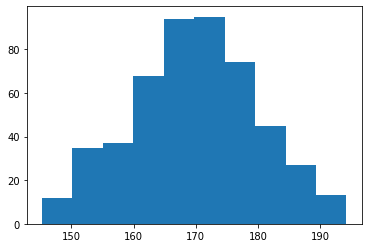

In [149]:
def draw_distribution():
    """Funkcja rysuje rozkład statystyki testowej"""
    dummy = np.random.normal(170, 10, 500)
    plt.hist(dummy)
    plt.show()
    pass
draw_distribution()

In [150]:
# Testy
dummy = [1, 2, 3, 4, 5]
dummy2 = [4, 5, 6, 7, 8]
dummy3 = [1, 3 , 3, 4, 6]
t_stat_selfmade = t_stat_single(dummy, 2)
t_stat_lib, _ = ttest_1samp(dummy, 2)
print('Statystyka testowa dla jednej próby:')
print(t_stat_selfmade, '- z naszej funkcji')
print(t_stat_lib, '- z gotowej biblioteki')
print()
t_stat_selfmade = t_stat_ind(dummy, dummy2)
t_stat_lib, _ = ttest_ind(dummy, dummy2)
print('Statystyka testowa dla dwóch prób niezależnych:')
print(t_stat_selfmade, '- z naszej funkcji')
print(t_stat_lib, '- z gotowej biblioteki')
print()
t_stat_selfmade = t_stat_dep(dummy, dummy3)
t_stat_lib, _ = ttest_rel(dummy, dummy3)
print('Statystyka testowa dla dwóch prób zależnych:')
print(t_stat_selfmade, '- z naszej funkcji')
print(t_stat_lib, '- z gotowej biblioteki')

Statystyka testowa dla jednej próby:
1.414213562373095 - z naszej funkcji
1.414213562373095 - z gotowej biblioteki

Statystyka testowa dla dwóch prób niezależnych:
-3.0 - z naszej funkcji
-3.0 - z gotowej biblioteki

Statystyka testowa dla dwóch prób zależnych:
-1.6329931618554525 - z naszej funkcji
-1.632993161855452 - z gotowej biblioteki


In [151]:
dataset = pd.read_csv('experiment_data.csv')
make_decision(dataset, ['Weight', 'Age'])

t: 6.914346193374633, df: 998, cv: 1.6463818766348755, p: 8.378631122241131e-12

Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.
